In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("../data/obent/train.csv")
test = pd.read_csv("../data/obent/test.csv")

In [3]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [4]:
train.isnull().any()

datetime         False
y                False
week             False
soldout          False
name             False
kcal              True
remarks           True
event             True
payday            True
weather          False
precipitation    False
temperature      False
dtype: bool

In [5]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [6]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [7]:
train_null = train

In [8]:
train_null.fillna(0)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,0.0,0,0,0.0,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,0.0,0,0,0.0,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,0.0,0,0,0.0,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,0.0,0,0,0.0,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,0.0,0,0,0.0,快晴,--,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,0,0,0.0,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,0,0,0.0,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,0.0,スペシャルメニュー（800円）,キャリアアップ支援セミナー,0.0,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,0,0,0.0,快晴,--,26.6


In [9]:
train_null.dropna(subset=['kcal'])

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
28,2014-1-7,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,NaN,快晴,--,7.3
29,2014-1-8,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,NaN,曇,--,9.8
30,2014-1-9,129,木,1,鶏チリソース,435.0,NaN,NaN,NaN,曇,--,10.9
31,2014-1-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,--,5.1
32,2014-1-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,NaN,晴れ,--,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...
201,2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


In [10]:
train_null["precipitation"].value_counts()

--     169
0       23
0.5      9
1.5      2
6        1
6.5      1
2.5      1
1        1
Name: precipitation, dtype: int64

In [14]:
train[["y","temperature"]].corr()

,y,temperature
y,1.000000,-0.655332
temperature,-0.655332,1.000000


In [15]:
train[["y","kcal"]].corr()

,y,kcal
y,1.000000,0.147269
kcal,0.147269,1.000000


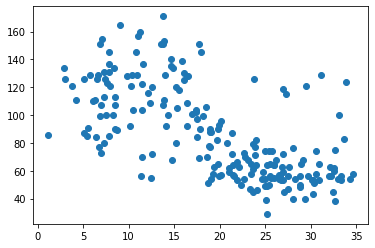

In [18]:
plt.scatter(train["temperature"], train["y"])